## Bibliotecas e módulos

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Simulação e visualização dos dados

[(-7.517526577754113, 5.101942181379384),
 (-11.825078554442136, 5.546385296559158)]

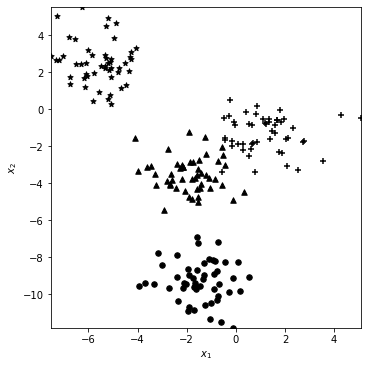

In [2]:
np.random.seed(2)
agrupamentos = 4
x, y = make_blobs(n_features=2, centers=agrupamentos, n_samples=200)

marr = ['o','+','^','*']
    
FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráficos...
ax = fig.add_subplot(spec[0, 0])
for i in range(agrupamentos):
    pos =  np.where(y == i)
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c='k', s=30)

ax.set_xlabel('$x_1$', fontsize=10)
ax.set_ylabel('$x_2$', fontsize=10)
ax.set(xlim=(np.min(x[:,0]), np.max(x[:,0])), ylim=(np.min(x[:,1]), np.max(x[:,1])))

## Agrupamento hierárquico dos dados simulados

In [7]:
#Número de agrupamentos
n_clusters = 4

tipos = ['single','complete','ward','average']
metodo = []

for t in range(4):
    metodo.append( AgglomerativeClustering(n_clusters=n_clusters, linkage=tipos[t], affinity='euclidean') )
    metodo[t].fit(x)

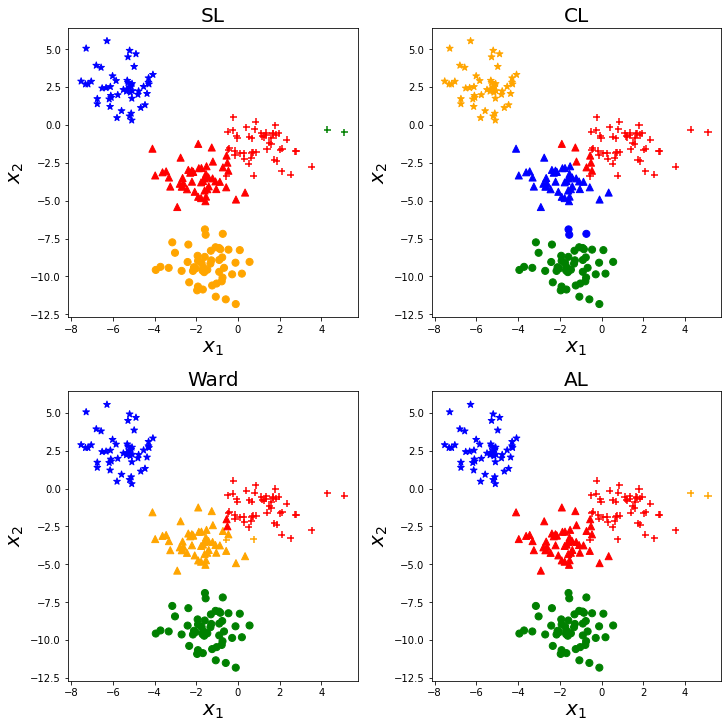

In [10]:
path_save = 'compAglomeraHierarquicos.png'
posSpec = [[0,0],[0,1],[1,0],[1,1]]

coll = ['red','blue','green','orange']
nomes = ['SL','CL','Ward','AL']
    
FS = (10,10) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

for t in range(4):
    #Subgráfico...
    ax = fig.add_subplot(spec[ posSpec[t][0],posSpec[t][1] ])
    for i in range(n_clusters):
        pos =  np.where(y == i)
        vecCol = [];
        for j in metodo[t].labels_[pos]: vecCol.append(coll[j])
        ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c=vecCol, s=50)

    ax.set_xlabel('$x_1$', fontsize=20); ax.set_ylabel('$x_2$', fontsize=20)
    ax.set_title(nomes[t],fontsize=20)

plt.savefig(path_save,dpi=300)
plt.show()